In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
FONTSIZE = 18

df = pd.read_csv('./src/csv/all.csv', sep=',')
theta = df['theta'].to_numpy()
sigma_theta = 0.5
N = df['N'].to_numpy()
sigma_N = np.array([20] * 8 + [10] * 5)

a = 1.5471949370365767 +- 0.01960609036633219
b = 1.075789912074607 +- 0.015378759762615107
N(0) = 0.929549523355866 +- 0.01328820678340015
N(90) = 0.38124505383203294 +- 0.0036217713210846686


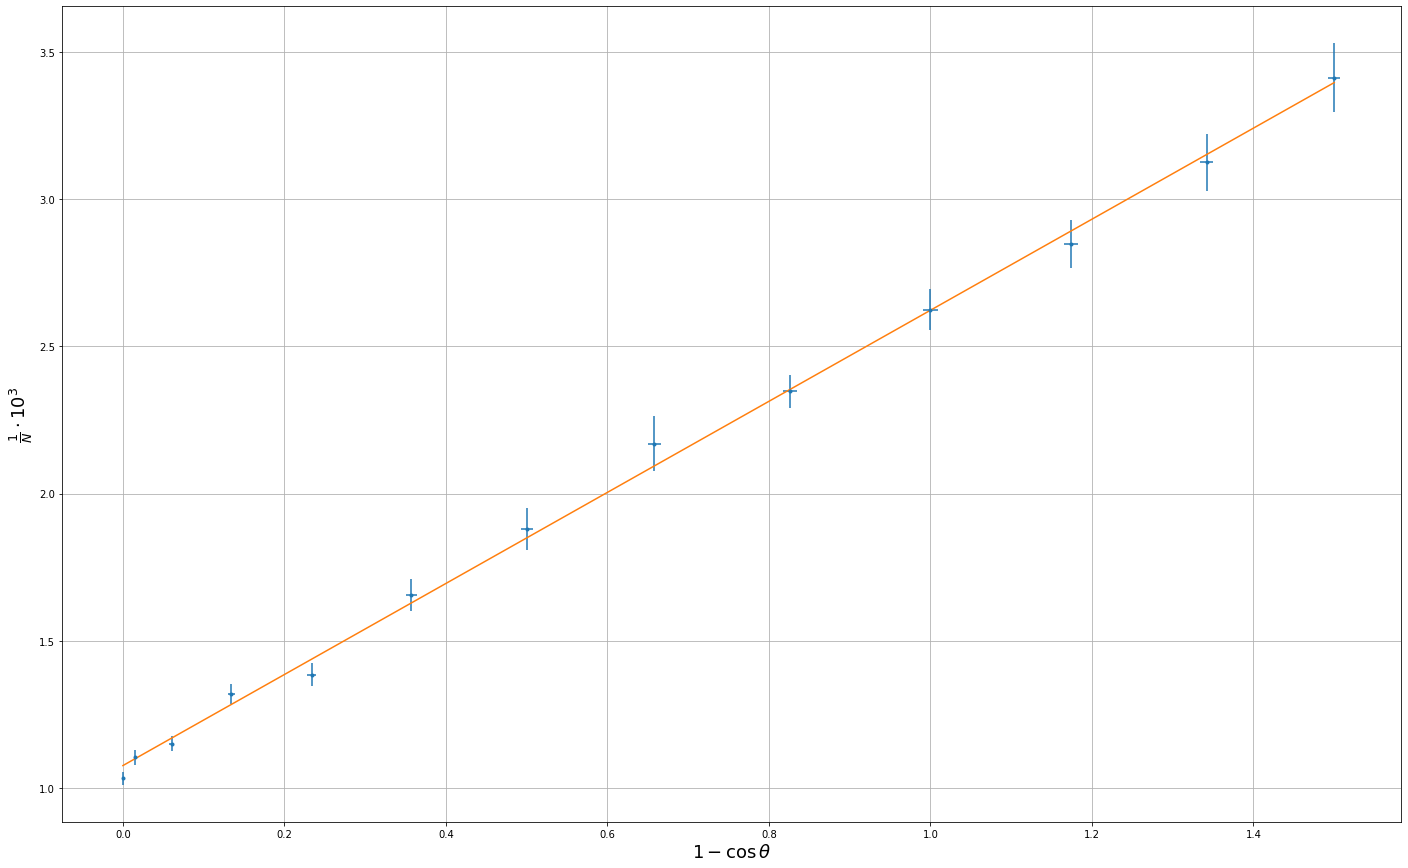

In [59]:
plt.figure(figsize=[24, 15])
y = 1 / N * 1e3
dy = sigma_N / N**2 * 1e3
x = 1 - np.cos(theta * np.pi / 180)
dx = sigma_theta * np.pi / 180 * np.abs(np.sin(theta * np.pi / 180))
plt.errorbar(x=x, y=y, yerr=dy, xerr=dx, marker='.', ls='')

trend = np.poly1d(np.polyfit(x, y, 1))
plt.plot(x, trend(x))
plt.grid()
plt.xlabel("$1 - \\cos{\\theta}$", fontsize=FONTSIZE)
plt.ylabel("$\\frac{1}{N} \\cdot 10^3$", fontsize=FONTSIZE)
trend
N_zero_B = 1 / trend(0)
N_90_B = 1 / trend(1)
a, b = trend
da = 1 / np.sqrt(len(x)) * np.sqrt(
  (np.mean(y**2) - np.mean(y)**2) / 
  (np.mean(x**2) - np.mean(x)**2) - a**2
)
db = da * np.sqrt(np.mean(x**2))
dzerb = N_zero_B**2 * db
d90 = N_90_B**2 * np.sqrt(da**2 + db**2)
print(f'a = {a} +- {da}')
print(f'b = {b} +- {db}')
print(f'N(0) = {N_zero_B} +- {dzerb}')
print(f'N(90) = {N_90_B} +- {d90}')

In [58]:
E_0 = 662 #keV
mc2 = E_0 * N_90_B / (N_zero_B - N_90_B)
dmc2 = E_0 * np.sqrt(
  (N_90_B * dzerb / (N_zero_B - N_90_B)**2)**2 + 
  (
    1 / (N_zero_B - N_90_B) + N_90_B / (N_zero_B - N_90_B)**2
  )**2 * d90**2
) 
print(f'mc2 = {mc2} +- {np.ceil(dmc2)} keV')

mc2 = 460.2994133095161 +- 14.0 keV
